# Random Forest - Caso Titanic

En este notebook, utilizaremos Random Forest para entrenar un algoritmo de clasificación que permita establecer un modelo que prediga los sobrevivientes del dataset Titanic

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carga de Datos y Análisis Exploratorio

In [64]:
df = pd.read_csv('titanic.csv')

In [65]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Valores perdidos

La cabina no aporta mucho en el análisis, pero la edad es una variable importante para predecir si una persona sobrevivió o no a la trajedia. A continuación, una forma de "visualizar" los valores perdidos.

Haremos una imputación de la edad del pasajero en función del promedio de edad de la clase en la que viajaba.

In [66]:
edades = round(df.groupby('Pclass').mean()['Age'])
edades

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_4340\3638205792.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  edades = round(df.groupby('Pclass').mean()['Age'])


Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [67]:
# creamos una funcion que imputa la edad en caso de estar nula
def imputar_edad(cols):
    edad = cols[0]
    pclass = cols[1]
    if(pd.isnull(edad)):
        if(pclass==1):
            return 38
        if(pclass==2):
            return 30
        if(pclass==3):
            return 25
    else:
        return edad

In [68]:
df['Age'] = df[['Age','Pclass']].apply(imputar_edad, axis=1)

In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Formulación del modelo

En esta sección seleccionaremos las variables que incorporaremos en la matriz de predictores "X" y en el vector de resultados "y", ya que no todas las columnas son de utilidad.

In [94]:
X =df[['Age','Sex','SibSp','Pclass','Parch','Fare']] 
y = df[['Survived']]

In [95]:
X=pd.get_dummies(X,drop_first=True)

In [96]:
X.head(2)

,Age,SibSp,Pclass,Parch,Fare,Sex_male
0,22.0,1,3,0,7.2500,1
1,38.0,1,1,0,71.2833,0


### Validación Cruzada

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=0)

### Modelamiento con Árbol de Decisión

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
clf = DecisionTreeClassifier(max_depth = 3, random_state=0)

In [101]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [102]:
from sklearn.tree import plot_tree

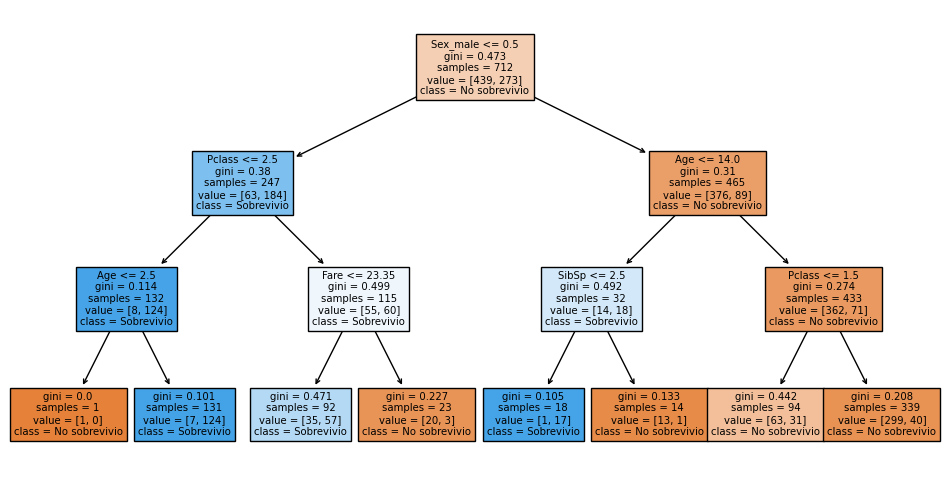

In [103]:
plt.figure(figsize=(12,6))
plot_tree(clf,feature_names = X.columns,
                 class_names=['No sobrevivio','Sobrevivio'],
                 filled = True);

### Importancia de los features

In [110]:
pd.DataFrame(clf.feature_importances_,index=X.columns, columns=["Importancia"])

,Importancia
Age,0.070737
SibSp,0.075520
Pclass,0.176426
Parch,0.000000
Fare,0.055391
Sex_male,0.621926


La clase mas importante es el Sexo, y la clase de pasajero. Se puede ocupar unicamente el arbol para ver la importancia de las variables.

### Evaluacion del modelo

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [105]:
y_pred=clf.predict(X_test)

In [106]:
#desempeño set test
accuracy_score(y_test,y_pred)

0.8212290502793296

In [107]:
#desempeño set train
accuracy_score(y_train,clf.predict(X_train))

0.8342696629213483

In [108]:
confusion_matrix(y_test,y_pred)

array([[96, 14],
       [18, 51]], dtype=int64)